# Titanic dataset a analyses

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Look into the data is necessary to get informations about what we have. First of all lets look the missing data of this titanic dataframe 

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


using seaborn to visualisy the missing data

<AxesSubplot:>

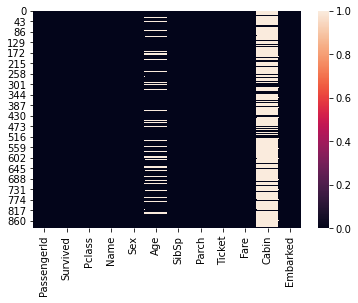

In [8]:
sns.heatmap(train.isnull())

or do it a way better

<AxesSubplot:>

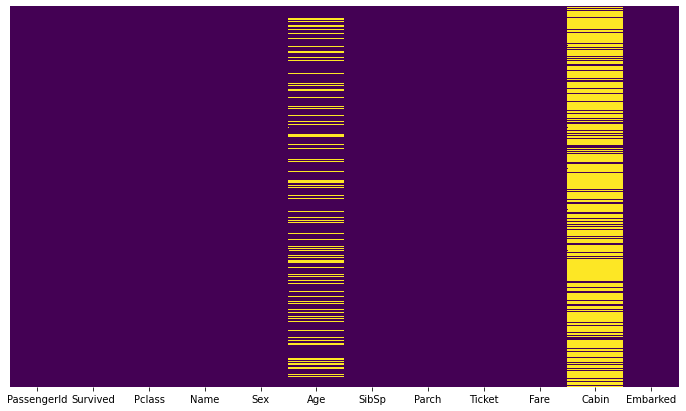

In [44]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

we see the age and cabin have some missing information but how much of this is information is missing

In [10]:
nullOnAge = train["Age"].isnull().sum()
nullOnAge

177

In [11]:
nullOnAge/(len(train["Age"]))

0.19865319865319866

about 20% of the Age data is missing

Now lets look around the cabin missing data

In [12]:
nullOnCabin = train["Cabin"].isnull().sum()
nullOnCabin

687

In [13]:
nullOnCabin/len(train["Cabin"])

0.7710437710437711

77% of data is missing on the Cabin collum

its possible to use the age if we complete the missing anwsers. One strategy is to use the Pclass columns who has the pasxsanger class information to use the mean of each one of them to replace the missing age. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

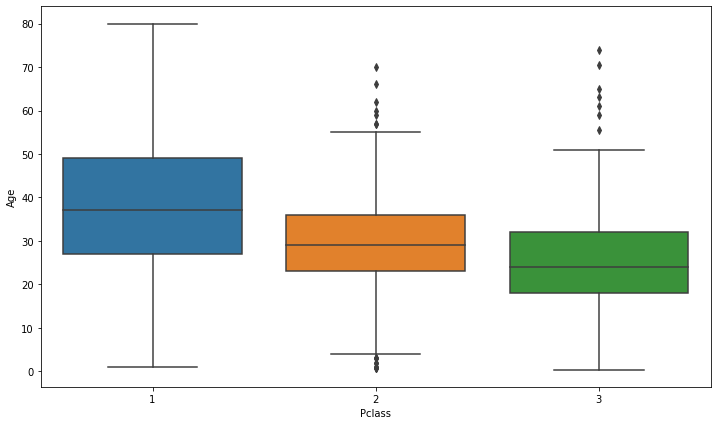

In [45]:

plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

### before it let give a look at the suvivers

from this dataset the major of people there died

<AxesSubplot:xlabel='Survived', ylabel='count'>

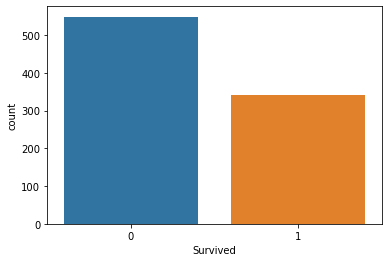

In [20]:
sns.countplot(x="Survived",data=train)

looking the plot below the major of the ones who died was the men while 2/3 of women lived. Let check out what was this exactly number it can helps in the future analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

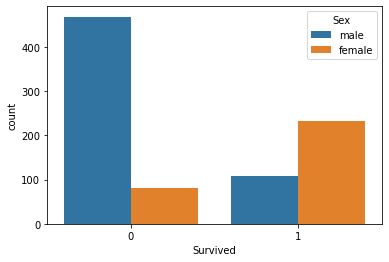

In [21]:
sns.countplot(x="Survived",data=train,hue='Sex')

In [36]:
totalman=(train["Sex"] == "male").sum()
manSurvived=((train["Survived"]== 1)&(train["Sex"] == "male")).sum()

In [35]:
per_manSurvived=manSurvived/totalman
per_manSurvived

# 18,9% of the man survived

0.18890814558058924

In [38]:
totalwoman=(train["Sex"] == "female").sum()
womanSurvived=((train["Survived"]== 1)&(train["Sex"] == "female")).sum()

In [40]:
per_womanSurvived=womanSurvived/totalwoman
per_womanSurvived

#74% of the woman on titanic survived

0.7420382165605095

<AxesSubplot:xlabel='Survived', ylabel='count'>

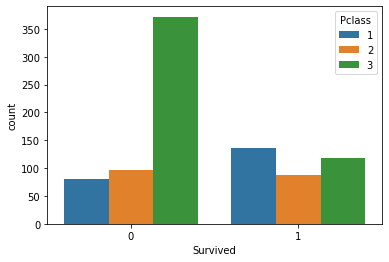

In [50]:
sns.countplot(x="Survived",data=train,hue='Pclass')

Giving a look at the age

<AxesSubplot:>

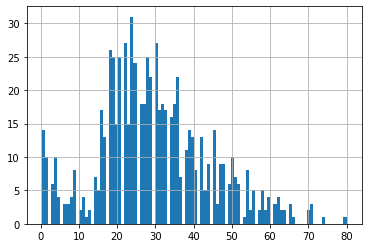

In [54]:
train['Age'].hist(bins=100)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

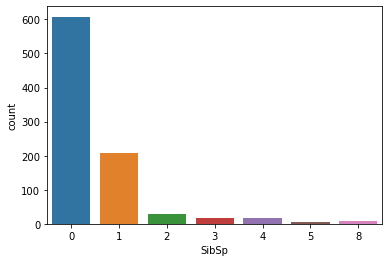

In [55]:
sns.countplot(x='SibSp',data=train)